# Neural Networks

A full CNN example on CIFAR-10 with visualization of feature maps at each conv layer.

---


##  Install & Setup


In [1]:
# Common imports
import numpy as np
import matplotlib.pyplot as plt
import time
import random

seed = 42
np.random.seed(seed)
random.seed(seed)

print('Setup done')


Setup done


###  CNNs — Convolution & Pooling (visual) and example on CIFAR-10

In [2]:
# CIFAR-10 CNN (Keras) + feature map visualization
from tensorflow.keras import datasets, layers, models

In [3]:
(x_train_c, y_train_c), (x_test_c, y_test_c) = datasets.cifar10.load_data()
x_train_c = x_train_c.astype('float32')/255.0
x_test_c = x_test_c.astype('float32')/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
model_c = models.Sequential([
  layers.Input(shape=(32,32,3)),
  layers.Conv2D(32,3,activation='relu', padding='same', name='conv1'),
  layers.Conv2D(32,3,activation='relu', padding='same', name='conv2'),
  layers.MaxPool2D(2),
  layers.Conv2D(64,3,activation='relu', padding='same', name='conv3'),
  layers.Conv2D(64,3,activation='relu', padding='same', name='conv4'),
  layers.MaxPool2D(2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(10, activation='softmax')
])

In [6]:
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train briefly (small epochs for demo)
hist_c = model_c.fit(x_train_c[:20000], y_train_c[:20000], validation_split=0.1, epochs=8, batch_size=128, verbose=2)

Epoch 1/8
141/141 - 12s - 83ms/step - accuracy: 0.2871 - loss: 1.9363 - val_accuracy: 0.4515 - val_loss: 1.5479
Epoch 2/8
141/141 - 1s - 10ms/step - accuracy: 0.4397 - loss: 1.5292 - val_accuracy: 0.5225 - val_loss: 1.3299
Epoch 3/8
141/141 - 2s - 11ms/step - accuracy: 0.5200 - loss: 1.3251 - val_accuracy: 0.5750 - val_loss: 1.1968
Epoch 4/8
141/141 - 1s - 10ms/step - accuracy: 0.5759 - loss: 1.1890 - val_accuracy: 0.6300 - val_loss: 1.0812
Epoch 5/8
141/141 - 1s - 10ms/step - accuracy: 0.6126 - loss: 1.0847 - val_accuracy: 0.6320 - val_loss: 1.0288
Epoch 6/8
141/141 - 1s - 10ms/step - accuracy: 0.6428 - loss: 0.9977 - val_accuracy: 0.6520 - val_loss: 1.0241
Epoch 7/8
141/141 - 3s - 18ms/step - accuracy: 0.6741 - loss: 0.9146 - val_accuracy: 0.6775 - val_loss: 0.9354
Epoch 8/8
141/141 - 1s - 10ms/step - accuracy: 0.7058 - loss: 0.8329 - val_accuracy: 0.6740 - val_loss: 0.9500


In [8]:
# Visualize feature maps for one image
import numpy as np
img = x_test_c[100:101]  # single image
print(img)
layer_names = [layer.name for layer in model_c.layers if 'conv' in layer.name]
print('Conv layers:', layer_names)

[[[[0.4627451  0.52156866 0.654902  ]
   [0.4627451  0.52156866 0.6509804 ]
   [0.47058824 0.5294118  0.65882355]
   ...
   [0.1882353  0.2784314  0.25490198]
   [0.1254902  0.20392157 0.14509805]
   [0.11372549 0.1882353  0.11764706]]

  [[0.45490196 0.5137255  0.64705884]
   [0.45490196 0.5176471  0.6431373 ]
   [0.4627451  0.5254902  0.6509804 ]
   ...
   [0.16470589 0.25490198 0.2       ]
   [0.09803922 0.14901961 0.09803922]
   [0.08627451 0.14509805 0.09411765]]

  [[0.49411765 0.5372549  0.65882355]
   [0.49019608 0.5372549  0.654902  ]
   [0.49411765 0.54901963 0.6666667 ]
   ...
   [0.10196079 0.16078432 0.10588235]
   [0.10980392 0.18039216 0.11764706]
   [0.10980392 0.21568628 0.13333334]]

  ...

  [[0.67058825 0.67058825 0.6313726 ]
   [0.6509804  0.6431373  0.62352943]
   [0.6313726  0.6313726  0.6       ]
   ...
   [0.7176471  0.69803923 0.69411767]
   [0.7058824  0.6862745  0.68235296]
   [0.6901961  0.6745098  0.6627451 ]]

  [[0.63529414 0.64705884 0.6039216 ]
   [0.6

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


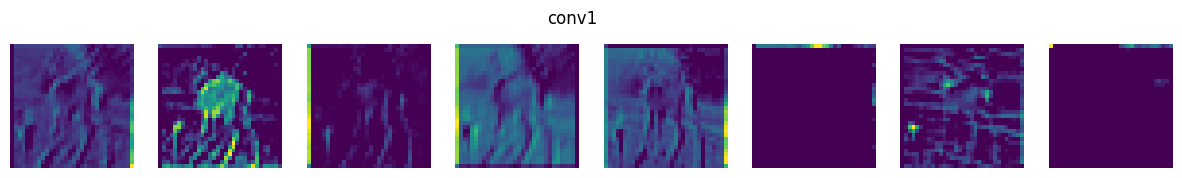

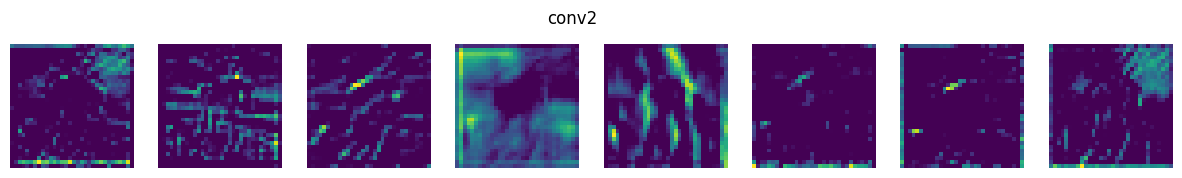

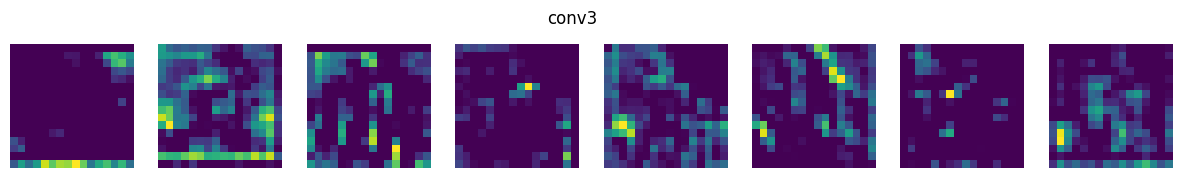

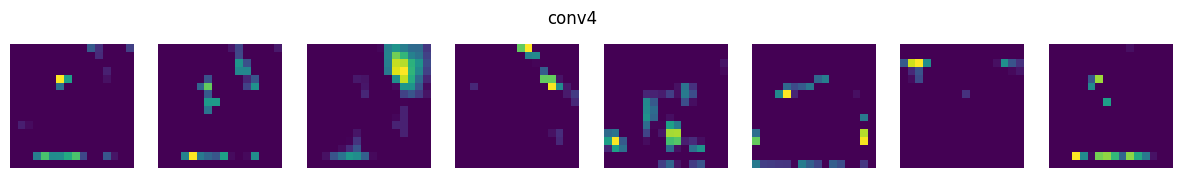

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
Predicted class: 4


In [9]:
# Extract outputs of specific layers
# model_c.get_layer(name).output retrieves the tensor output of each of those layers.
from tensorflow.keras.models import Model
outputs = [model_c.get_layer(name).output for name in layer_names]

# We create a visualization model whose:
# input = same as main model
# output = all selected layers’ outputs
# So when we pass an image, the model returns all intermediate feature maps instead of the final prediction.
vis_model = Model(inputs=model_c.layers[0].input, outputs=outputs)
feature_maps = vis_model.predict(img)

# plot feature maps for each conv layer (show first 8 channels)
import matplotlib.pyplot as plt
for fmap, name in zip(feature_maps, layer_names):
  chs = min(8, fmap.shape[-1])
  # Some layers have many channels (32, 64, 128…)
  # But we only plot the first 8.
  fig, axes = plt.subplots(1, chs, figsize=(15,2))
  fig.suptitle(name)
  for i in range(chs):
    ax = axes[i]
    ax.imshow(fmap[0,:,:,i], cmap='viridis')
    ax.axis('off')
  plt.show()

# show prediction
pred = model_c.predict(img).argmax(axis=1)
# argmax(axis=1) → index of the highest probability
print('Predicted class:', int(pred[0]))

* Class 0: Airplane
* Class 1: Automobile
* Class 2: Bird
* Class 3: Cat
* Class 4: Deer
* Class 5: Dog
* Class 6: Frog
* Class 7: Horse
* Class 8: Ship
* Class 9: Truck

## Why Only 8 Channels Per Layer?
CNN layers have many features (filters).

Showing all is too big and chaotic.

Showing 8 gives a quick, neat, easy-to-understand visual snapshot of ***how the layer “sees” the image***.

#### What's happening at each CNN layer

- **Conv layer:** learn multiple filters that detect local patterns (edges, textures). Output is a set of feature maps.
- **Activation (ReLU):** adds non-linearity.
- **Pooling:** reduces spatial size, makes features more translation invariant.
- **Stacking convs:** deeper convs detect higher-level patterns composed from previous features.
- **Flatten + Dense:** combine spatial features into global reasoning for classification.

Use the feature-map visualization above to show how early layers capture edges/color blobs while deeper layers capture object parts.

